In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, average, dendrogram, fcluster, single, complete
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

path = '../files/'

In [2]:
#Leitura do dataset filtrado
df = pd.read_csv( path + "4mula_filtered.csv" )
#Coleta do corpus filtrado
corpus = df['filtered_lyrics']
title = [(art + ' - ' + name) for art, name in zip(df['art_name'],df['music_name']) ]
corpus = corpus[0:2500]

In [3]:
tfidf = TfidfVectorizer(min_df = 5, max_df = 0.95, max_features = 8000)
tfidf.fit(corpus)
text = tfidf.transform(corpus)

In [4]:
hc = AgglomerativeClustering(n_clusters=6, affinity='cosine',linkage='average')

In [5]:
y_hc = hc.fit_predict(text.todense())
dist = 1 - cosine_similarity(text)
dist = dist - dist.min() # get rid of some pesky floating point errors that give neg. distance
linkage_matrix = ward(dist) # replace with complete, single, or other scipy.cluster.hierarchical algorithms

/home/renan/grad/20IC/tm_er/venv/lib/python3.9/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


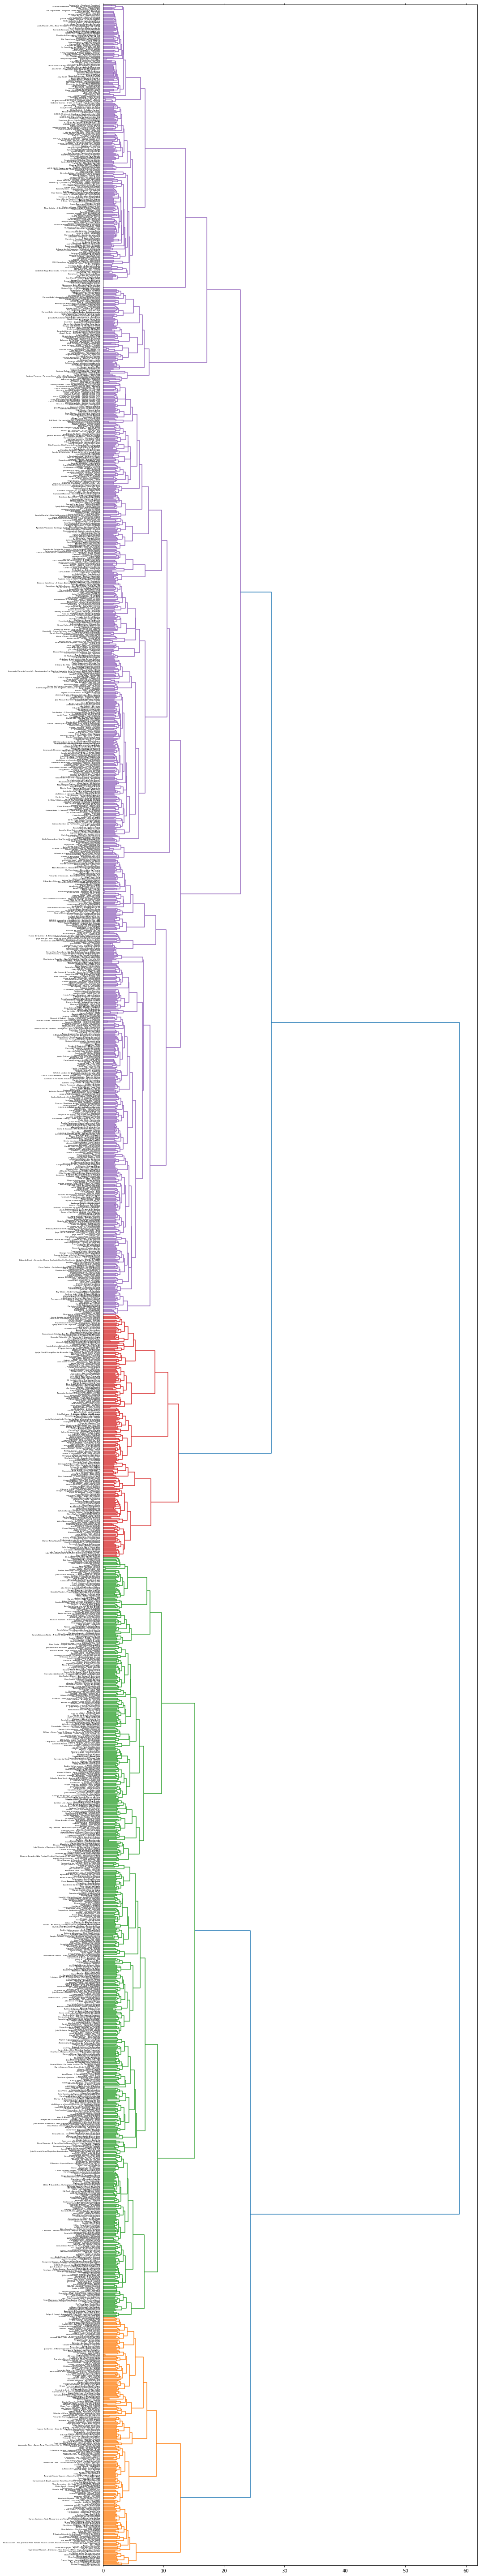

In [6]:
MAX_COPHENETIC_DIST = max(linkage_matrix[:,2]) * 0.39 # max distance between points to be considered together. can be tuned.

fig, ax = plt.subplots(figsize=(15, 80)) # set size
ax = dendrogram(linkage_matrix, orientation="right", color_threshold=MAX_COPHENETIC_DIST, leaf_font_size=4,
                labels=title[0:2500])

plt.tick_params(axis= 'x', which='both',  bottom='off', top='off',labelbottom='off')

plt.tight_layout() #show plot with tight layout
#plt.savefig('ward_clusters_all.png', dpi=300)


In [7]:
from sklearn.metrics import silhouette_score

In [8]:
def silhouette_k(distance_matrix, linkage_matrix, max_k=20):
    scores = []
    for i in range(2, max_k+1):
        clusters = fcluster(linkage_matrix, i, criterion='maxclust')
        score = silhouette_score(distance_matrix, clusters, metric='precomputed')
        print("Silhouette score with {} clusters:".format(i), score)
        scores.append(score)
    plt.title("Silhouette score vs. number of clusters")
    plt.xlabel("# of clusters")
    plt.ylabel("Score (higher is better)")
    plt.plot(np.arange(2, max_k+1), scores)
    plt.show()
    return scores

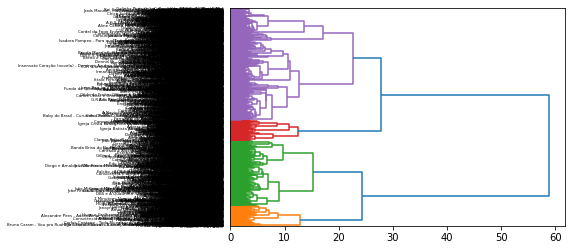

In [12]:
dendr = dendrogram(linkage_matrix, orientation="right", color_threshold=MAX_COPHENETIC_DIST, leaf_font_size=4,
                labels=title[0:2500])

('icoord',
 [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [82.5, 82.5, 112.5, 112.5],
  [52.5, 52.5, 97.5, 97.5],
  [13.75, 13.75, 75.0, 75.0],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [140.0, 140.0, 160.0, 160.0],
  [175.0, 175.0, 185.0, 185.0],
  [195.0, 195.0, 205.0, 205.0],
  [215.0, 215.0, 225.0, 225.0],
  [200.0, 200.0, 220.0, 220.0],
  [180.0, 180.0, 210.0, 210.0],
  [235.0, 235.0, 245.0, 245.0],
  [255.0, 255.0, 265.0, 265.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [275.0, 275.0, 292.5, 292.5],
  [260.0, 260.0, 283.75, 283.75],
  [240.0, 240.0, 271.875, 271.875],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360.0, 360.0],
  [385.0, 385.0, 395.0, 395.0